In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from joblib import dump, load

# Load data
df = pd.read_csv("/content/wind_data.csv", encoding= "ISO-8859-1")

# Preprocess data
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df = df.set_index('Date/Time')

scaler = MinMaxScaler()
df[['Wind Speed (m/s)', 'Wind Direction (ø)', 'Theoretical_Power_Curve (KWh)']] = scaler.fit_transform(df[['Wind Speed (m/s)', 'Wind Direction (ø)', 'Theoretical_Power_Curve (KWh)']])

# Split data
X = df.drop('LV ActivePower (kW)', axis=1)
y = df['LV ActivePower (kW)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

# Save model
dump(model, 'model.joblib')

# Load model
model = load('model.joblib')

In [ ]:
y_pred = model.predict(X_test)

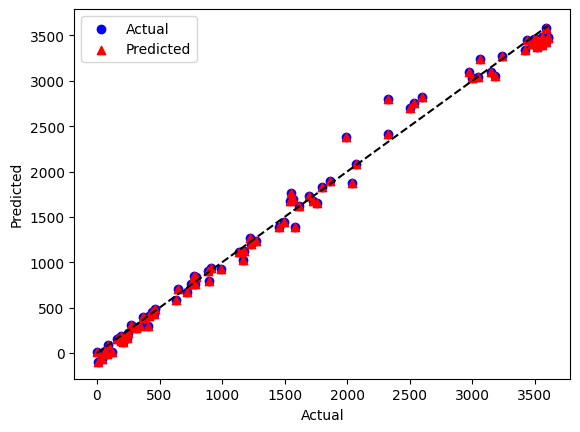

In [21]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, c='b', marker='o', label='Actual')
plt.scatter(y_test, y_pred, c='r', marker='^', label='Predicted')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()


In [22]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 77.31641844051913
